# Math387 Honours Numerical Analysis Lab Final
## Shenshun Yao 260709204

In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import math
import scipy.special
import scipy.misc

We are going to imply various approximation method to the function:
$$f_a(x) = \begin{cases}x^a&\textrm{for}\,\,x>0\\0&\textrm{for}\,\,x\leq0\end{cases},$$
where $ a >0$ is a constant.

### Part 1: 
Check the membership of $f_a$ into the scale $C^{k,\alpha}([-1,1])$.

Proof:

Here we need to find the maximum of $k + \alpha$ with

$$f_a(x) = \begin{cases}x^a&\textrm{for}\,\,x>0\\0&\textrm{for}\,\,x\leq0\end{cases}$$

such that $f_a \in C^{k}([-1,1])$ and $f_a^k \in C^{0,\alpha}([-1,1])$.

First we find that $\forall k \in \mathbb N, 0<\alpha \leq 1$ then $f_a \in C^{k}([-1,0])$ and $f_a^k \in C^{0,\alpha}([-1,0])$ holds since $f \equiv 0$. We only need to consider $x, y \in [0,1]$.

First, we consider $a=k \in \mathbb N$ then $f_a^a (a) = a!$ for $x>0$ and $0$ otherwise is discontinuous at $x=0$ then we find that $f_a^{a-1}(x) = (a-1)!x$ for $x>0$ and $0$ otherwise is continuous on $[-1,1]$. Moreover we consider that $a \in \mathbb Q$, since $x^a, a < 0$ then $x \neq 0$, hence we must have  $a \geq 0$. 
In this sense, $a \in \mathbb Q$, we have

$$f_a^a(x) = \begin{cases}a!x^{a-frac[a]}&\textrm{for}\,\,x>0\\0&\textrm{for}\,\,x\leq0\end{cases},$$

which is still continuous on the interval $[-1,1]$, we can take the maximum of $k$ such that 

$$k = \begin{cases}a - frac[a]&\textrm{for}\,\,a \in \mathbb Q \backslash \mathbb N \\a-1&\textrm{for}\,\,a \in \mathbb N\end{cases},$$

note that $frac[a]$ is the fraction part of $a$ if a is a fractional number. Now we will find the maximum of $\alpha$. If $\alpha \leq a$ and $\forall a > 0$, 

$$\sup_{-1\leq x \lt y\leq1}\frac{|f(x)-f(y)|}{|x-y|^\alpha} = \sup_{-1\leq x \lt y\leq1} \frac{|x^a-y^a|}{|x-y|^\alpha} \leq \frac{|x-y|^\alpha}{|x-y|^\alpha} \leq |x-y|^{a-\alpha} \leq 2^{a-\alpha},$$

this implies that $f_a \in C^{k}([-1,1])$ and $f_a^k \in C^{0,\alpha}([-1,1])$. Now we consider $a > \alpha$ and $\forall a>0$,

$$\sup_{-1\leq x \lt y\leq1}\frac{|f(x)-f(y)|}{|x-y|^\alpha} = \sup_{-1\leq x \lt y\leq1} \frac{|x^a-y^a|}{|x-y|^\alpha} \geq \sup_{-1 \leq x\leq 1} \frac{|(2x)^a - x^a|}{|2x-x|^\alpha} = (2^a-1) \sup_{-1\leq x\leq 1} x^{a-\alpha}$$

if $x=0$, then $\sup_{-1\leq x \lt y\leq1}\frac{|f(x)-f(y)|}{|x-y|^\alpha}$ diverges. Therefore, $\alpha \leq a$ and $\forall a > 0$, we conclude that the maximum of $\alpha + k$ is $2a - frac[a]$ for $a \in \mathbb Q \backslash \mathbb N$ and $2a-1$ for $a \in \mathbb N$. $\mathbf{Q.E.D}$

### Part 2:( A picewise constant function on the uniform partition of $[-1,1]$ )

We deigned an algorithm  below and consider 3 sets of data where  $"a = 0.5, n = 100"$,  $"a = 0.6, n = 100"$,  $"a = 1.5, n = 100"$, we choose $n$ is large such that the picewise function can fit $f_a(x)$ better;

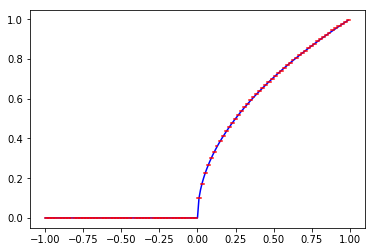

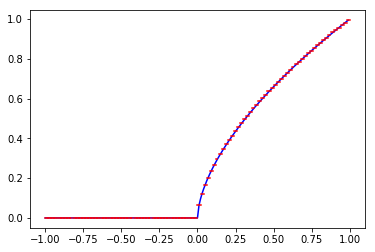

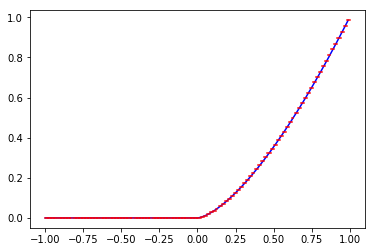

In [2]:
def plot_piecewise_constant_approximate(f, n):
    x_range = np.arange(-1, 1, 0.01)
    y_original = np.zeros((x_range.shape[0],))
    for (index, x_value) in enumerate(x_range):
        y_original[index] = f(x_value)
        
    plt.plot(x_range, y_original,'b')
    
    for i in range(0, n):
        x_lower_end = -1 + ( i    / n) * (1 - (-1))
        x_upper_end = -1 + ((i+1) / n) * (1 - (-1))
        x_mid_point = (x_lower_end + x_upper_end) / 2
        f_approximate_value = f(x_mid_point)
        f_approximate = lambda x : f_approximate_value
        
        x_range = np.arange(x_lower_end, x_upper_end, 0.01)
        y_approximate = (np.vectorize(f_approximate)) (x_range)
        plt.plot(x_range, y_approximate,'r')

    plt.show()

plot_piecewise_constant_approximate(lambda x : x**0.5 if x > 0 else 0, 100)
plot_piecewise_constant_approximate(lambda x : x**0.6 if x > 0 else 0, 100)
plot_piecewise_constant_approximate(lambda x : x**1.5 if x > 0 else 0, 100)


In the asymptotic regime where $n$ is large, we expect the error of the approximation to behave like$ n^{−r}$ for some $r$, which we call the rate of convergenc, then we compute the error of the approximation in the maximum norm;

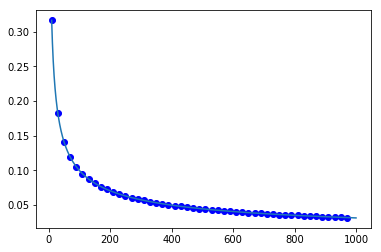

0.5


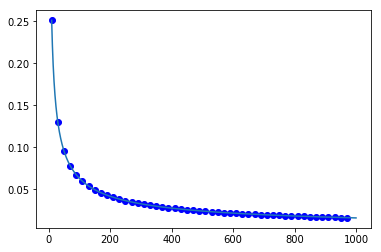

0.6


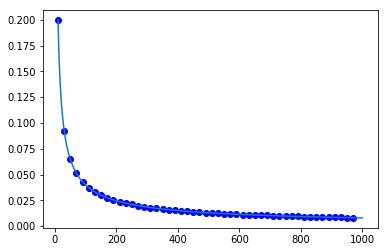

0.7


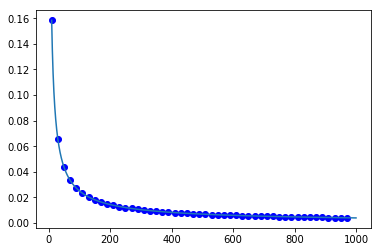

0.8


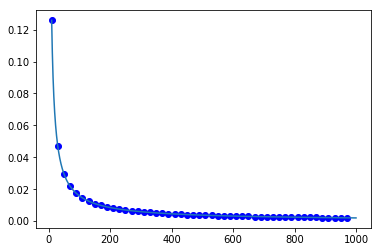

0.9


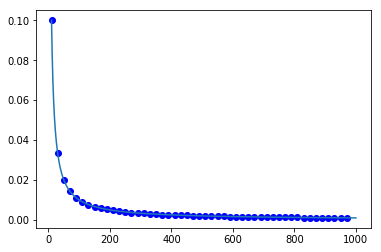

1.0


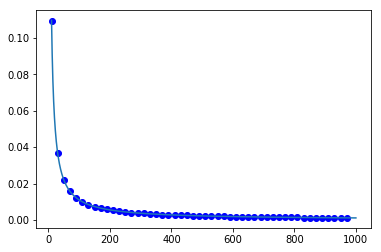

0.999393752039


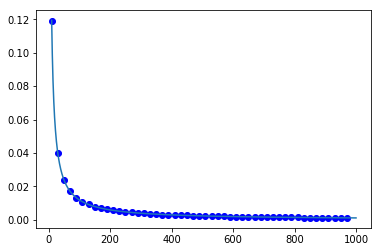

0.998788315523


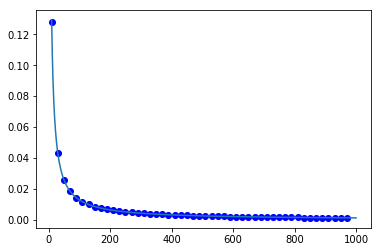

0.998183690358


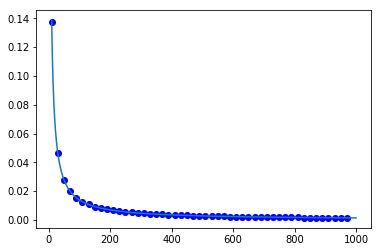

0.997579876442


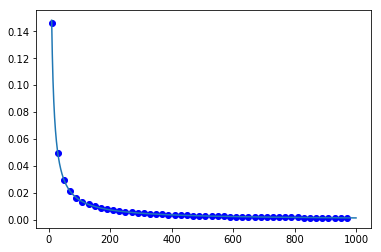

0.996976873664


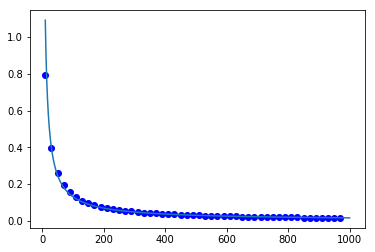

0.922859638308


In [3]:
def plot_piecewise_constant_error(f, n_min, n_max, step):
    x_pos = np.zeros((int((n_max - n_min) / step),))
    y_pos = np.zeros((int((n_max - n_min) / step),))

    for i in range(0, int((n_max - n_min) / step)):
        n = n_min + step * i
        max_norm_error = 0
        for j in range(0, n):
            x_lower_end = -1 + ( j    / n) * (1 - (-1))
            x_upper_end = -1 + ((j+1) / n) * (1 - (-1))
            x_mid_point = (x_lower_end + x_upper_end) / 2
            
            f_lower_value = f(x_lower_end)
            f_upper_value = f(x_upper_end)
            f_approximate_value = f(x_mid_point)
            error = max(abs(f_lower_value - f_approximate_value),
                        abs(f_upper_value - f_approximate_value))
            max_norm_error = max(max_norm_error, error)
        x_pos[i] = n
        y_pos[i] = max_norm_error

    c = np.polyfit(np.log(x_pos), np.log(y_pos), 1)

    a0 = math.exp(c[1])
    a1 = c[0]
    convergence_rate_function = lambda x : a0 * (x ** a1)
    convergence_rate_x = np.arange(n_min, n_max, 0.01)
    convergence_rate_y = np.zeros((convergence_rate_x.shape[0],))
    for (index, x_value) in enumerate(convergence_rate_x):
        convergence_rate_y[index] = convergence_rate_function(x_value)
    
    plt.plot(x_pos, y_pos, 'bo')
    plt.plot(convergence_rate_x, convergence_rate_y)
    plt.show()

    return (-a1)

print(plot_piecewise_constant_error(lambda x : x**0.5 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**0.6 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**0.7 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**0.8 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**0.9 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**1.1 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**1.2 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**1.3 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**1.4 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**1.5 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_constant_error(lambda x : x**15 if x > 0 else 0, 10, 1000, 20))

We conclude that $$r(a) = \begin{cases}a&\textrm{for}\,\,a<1\\1&\textrm{for}\,\,a\geq1\end{cases},$$ 

such that the rate of convergence depend on the $a$, the parameter of function $f_a(x)$.

### Part 2:( A continuous piecewise linear function on the uniform partition of $[-1,1]$ )
As happens in the trapezoidal rule, we define the continuous piecewise linear function in the subinterval $[a,b]$ s.t. 

$$\int_{a}^{b}f(x)dx \approx (b-a) \frac{f(a) + f(b)}{2}$$

We deigned an algorithm  below and consider 3 sets of data where  $"a = \frac{1}{2}, n = 20"$,  $"a = 4, n = 20"$,  $"a = 6, n = 20"$, we choose $n$ is relatively large shuch that the picewise function can fit $f_a(x)$ better;

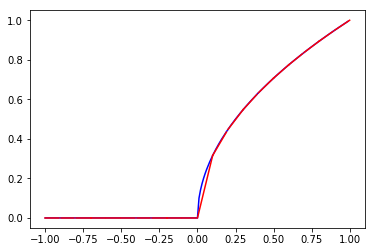

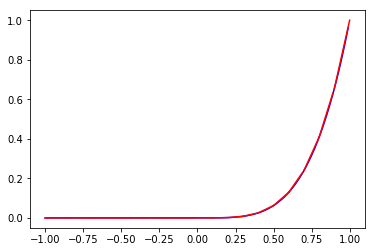

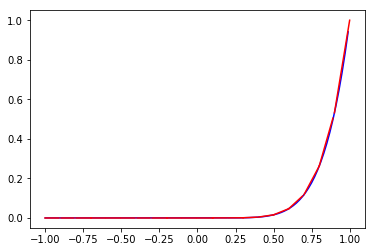

In [4]:
def plot_piecewise_linear_approximate(f, n):
    x_range = np.arange(-1, 1, 0.01)
    y_original = np.zeros((x_range.shape[0],))
    for (index, x_value) in enumerate(x_range):
        y_original[index] = f(x_value)

    plt.plot(x_range, y_original, 'b')
    
    for i in range(0, n):
        x_lower_end = -1 + ( i    / n) * (1 - (-1))
        x_upper_end = -1 + ((i+1) / n) * (1 - (-1))
        f_slope = (f(x_upper_end) - f(x_lower_end)) / (x_upper_end - x_lower_end)
        f_approximate = lambda x : f(x_lower_end) + f_slope * (x - x_lower_end)
        
        x_range = np.arange(x_lower_end, x_upper_end, 0.01)
        y_approximate = (np.vectorize(f_approximate)) (x_range)
        plt.plot(x_range, y_approximate,'r')

    plt.show()

plot_piecewise_linear_approximate(lambda x : x**0.5 if x > 0 else 0, 20)
plot_piecewise_linear_approximate(lambda x : x**4 if x > 0 else 0, 20)
plot_piecewise_linear_approximate(lambda x : x**6 if x > 0 else 0, 20)

In the asymptotic regime where $n$ is large, we expect the error of the approximation to behave like $ n^{−r}$ for some $r$, which we call the rate of convergenc, then we compute the error of the approximation in the maximum norm; Note that to find the error of the approximation in the maximum norm we imply binary search method to compute the maximum norm quickly;

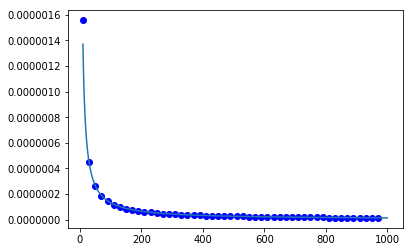

1.01896884267


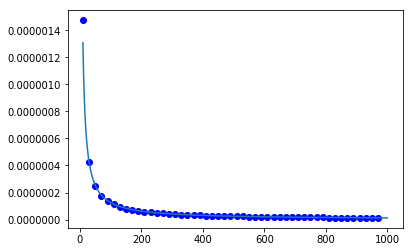

1.01725825967


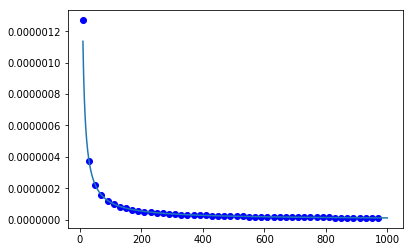

1.01555009178


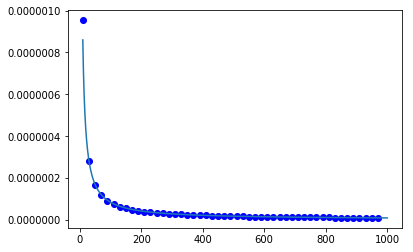

1.01384434488


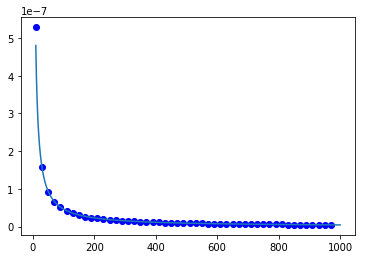

1.01214102594


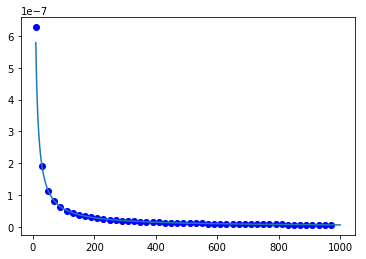

1.00874169997


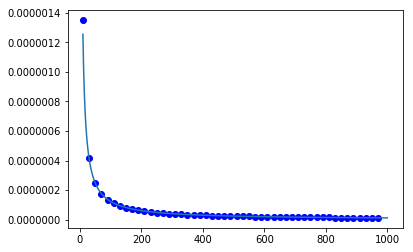

1.00704570575


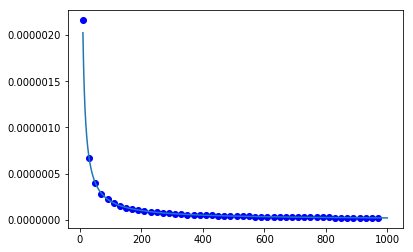

1.00535216489


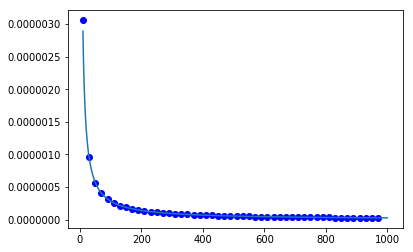

1.00366108465


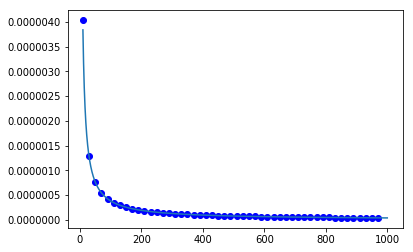

1.00197247093


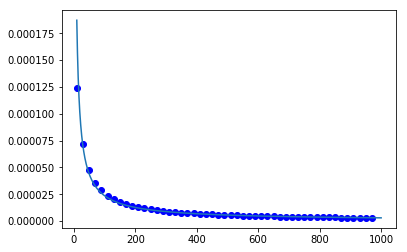

0.897764456603


In [5]:
def plot_piecewise_linear_error(f, n_min, n_max, step=100):
    x_pos = np.zeros((int((n_max - n_min) / step),))
    y_pos = np.zeros((int((n_max - n_min) / step),))

    def binary_search(f, x, y, threshold = 0.0001):
        if y - x < threshold:
            return (x + y) / 2
        else:
            midpoint = (x + y) / 2
            delta_left  = 1 if (f(x) - f(x - threshold)) > 0 else -1
            delta_right = 1 if (f(x + threshold) - f(x)) > 0 else -1
            if delta_left == 1 and delta_right == 1:
                return binary_search(f, midpoint, y, threshold)
            elif delta_left == -1 and delta_right == -1:
                return binary_search(f, x, midpoint, threshold)
            else:
                return binary_search(f, x - threshold, x + threshold, threshold)

    for i in range(0, int((n_max - n_min) / step)):
        n = n_min + step * i
        max_norm_error = 0
        for j in range(0, n):
            x_lower_end = -1 + ( j    / n) * (1 - (-1))
            x_upper_end = -1 + ((j+1) / n) * (1 - (-1))
            x_mid_point = (x_lower_end + x_upper_end) / 2
            
            f_lower_value = f(x_lower_end)
            f_upper_value = f(x_upper_end)
            f_approximate_value = f(x_mid_point)
            f_slope = (f(x_upper_end) - f(x_lower_end)) / (x_upper_end - x_lower_end)
            f_approximate = lambda x : f(x_lower_end) + f_slope * (x - x_lower_end)
            
            error_function = lambda x : abs(f_approximate(x) - f(x))
            max_error_x = binary_search(error_function, x_lower_end, x_upper_end)
            
            max_norm_error = error_function(max_error_x)
        x_pos[i] = n
        y_pos[i] = max_norm_error
    
    c = np.polyfit(np.log(x_pos), np.log(y_pos), 1)

    a0 = math.exp(c[1])
    a1 = c[0]
    convergence_rate_function = lambda x : a0 * (x ** a1)
    convergence_rate_x = np.arange(n_min, n_max, 0.01)
    convergence_rate_y = np.zeros((convergence_rate_x.shape[0],))
    for (index, x_value) in enumerate(convergence_rate_x):
        convergence_rate_y[index] = convergence_rate_function(x_value)
    
    plt.plot(x_pos, y_pos, 'bo')
    plt.plot(convergence_rate_x, convergence_rate_y)
    plt.show()

    return (-a1)

print(plot_piecewise_linear_error(lambda x : x**0.5 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**0.6 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**0.7 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**0.8 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**0.9 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**1.1 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**1.2 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**1.3 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**1.4 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**1.5 if x > 0 else 0, 10, 1000, 20))
print(plot_piecewise_linear_error(lambda x : x**8 if x > 0 else 0, 10, 1000, 20))

We conclude that $$r(a)\approx 1,$$ 

such that the rate of convergence does not depend on the regularity of the function.

### Part 4:( Compute the Bernstein polynomial of degree n for f_a)

 We plot the cases where $a = 0.5,1.5,3$ with respect to the degree of bernstein polynomials is 20;

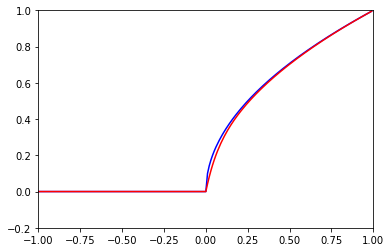

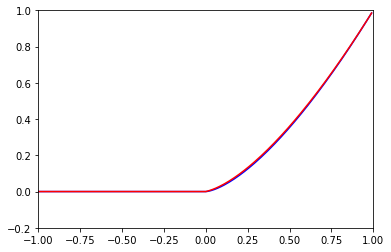

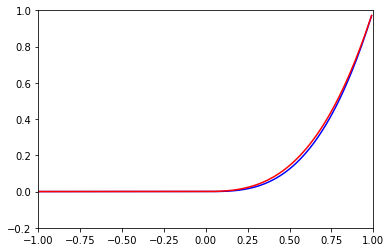

In [6]:
import scipy.misc

def bernstein_approximate(f, n):
    x_range = np.arange(-1, 1, 0.01)
    y_original = np.zeros((x_range.shape[0],))
    for (index, x_value) in enumerate(x_range):
        y_original[index] = f(x_value)

    def bernstein_basis_polynomial(v, n):
        return lambda x: \
            scipy.misc.comb(n, v) * (x**v) * ((1- x)**(n - v))
    
    y_fitted = np.zeros((x_range.shape[0],))
    for (x_index, x) in enumerate(x_range):
        if (x < 0):
            continue
        for v in range(0, n+1):
            y_fitted[x_index] = y_fitted[x_index] + \
                f(v / n) * (bernstein_basis_polynomial(v, n)(x))
            
    plt.plot(x_range, y_original, 'b')
    plt.plot(x_range, y_fitted, 'r')

    axes = plt.gca()
    axes.set_xlim([-1, 1])
    axes.set_ylim([-0.2, 1])
    plt.show()

bernstein_approximate(lambda x : x**0.5 if x > 0 else 0, 20)
bernstein_approximate(lambda x : x**1.5 if x > 0 else 0, 20)
bernstein_approximate(lambda x : x**3 if x > 0 else 0, 20)

In the asymptotic regime where $n$ is large, we expect the error of the approximation to behave like $ n^{−r}$ for some $r$, which we call the rate of convergenc, then we compute the error of the approximation in the maximum norm; Note that to find the error of the approximation in the maximum norm we imply binary search method to compute the maximum norm quickly;

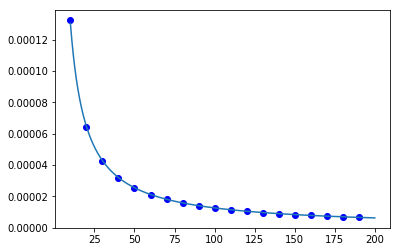

1.01337258635


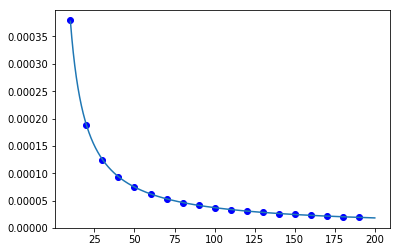

1.00438745988


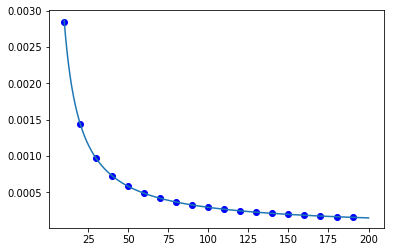

0.991425585734


In [7]:
def bernstein_approximate_error(f, n):
    x_range = np.arange(-1, 1, 0.01)
    y_original = np.zeros((x_range.shape[0],))
    for (index, x_value) in enumerate(x_range):
        y_original[index] = f(x_value)

    def bernstein_basis_polynomial(v, n):
        return lambda x: \
            scipy.misc.comb(n, v) * (x**v) * ((1- x)**(n - v))
    
    y_fitted = np.zeros((x_range.shape[0],))
    errors = np.zeros((x_range.shape[0],))
    
    for (x_index, x) in enumerate(x_range):
        if (x < 0):
            continue
        for v in range(0, n+1):
            y_fitted[x_index] = y_fitted[x_index] + \
                f(v / n) * (bernstein_basis_polynomial(v, n)(x))
        errors = abs(y_original[x_index] - y_fitted[x_index])
            
    return np.amax(errors)

def plot_bernstein_approximate_error(f, n_min, n_max, step):
    x_pos = np.zeros((int((n_max - n_min) / step),))
    y_pos = np.zeros((int((n_max - n_min) / step),))
    for (i, _) in enumerate(x_pos):
        n = n_min + step * i
        x_pos[i] = n
        y_pos[i] = bernstein_approximate_error(f, n)
        
    c = np.polyfit(np.log(x_pos), np.log(y_pos), 1)

    a0 = math.exp(c[1])
    a1 = c[0]
    convergence_rate_function = lambda x : a0 * (x ** a1)
    convergence_rate_x = np.arange(n_min, n_max, 0.01)
    convergence_rate_y = np.zeros((convergence_rate_x.shape[0],))
    for (index, x_value) in enumerate(convergence_rate_x):
        convergence_rate_y[index] = convergence_rate_function(x_value)
    
    plt.plot(x_pos, y_pos, 'bo')
    plt.plot(convergence_rate_x, convergence_rate_y)
    plt.show()
    print(-a1)

plot_bernstein_approximate_error(lambda x : x**0.5 if x > 0 else 0, 10, 200, 10)
plot_bernstein_approximate_error(lambda x : x**1.5 if x > 0 else 0, 10, 200, 10)
plot_bernstein_approximate_error(lambda x : x**3 if x > 0 else 0, 10, 200, 10)

We conclude that $$r(a)\approx 1,$$ 

such that the rate of convergence does not depend on the regularity of the function.

### Part 5:( Compute the Chebyshev Interpolation polynomial of degree n for f_a)

 We plot the cases where $a = 0.5,1.5,3$ with respect to the degree of Chebyshev Interpolation polynomials is 64;

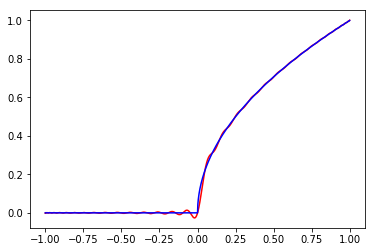

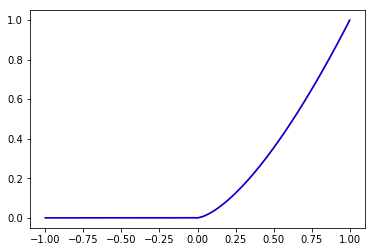

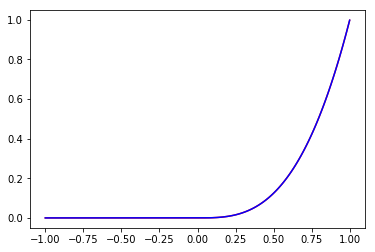

In [8]:
def T(n):
    return lambda x: np.cos(n * np.arccos(x))

def chebyshev_approximate(f, N):
    [X_MIN, X_MAX] = [-1.0, 1.0]
    x_notes = np.zeros((N+1,))
    for i in range(0, N+1):
        x_notes[i] = np.cos(np.pi * ((2 * i)+ 1) / (2 * N + 2))
    
    c = np.zeros((N+1,))
    for i in range(0, N+1):
        c[0] = c[0] + f(x_notes[i])
    c[0] = (1 / (N + 1)) * c[0]
    for j in range(1, N+1):
        for k in range(0, N+1):
            c[j] = c[j] + f(x_notes[k]) * (T(j)(x_notes[k]))
        c[j] = (2 / (N + 1)) * c[j]
    
    x = np.arange(X_MIN, X_MAX, 0.001)
    y = np.zeros((x.shape[0],))
    for (x_index, x_value) in enumerate(x):
        for j in range(0, N+1):
            y[x_index] = y[x_index] + c[j] * (T(j)(x_value))
        
    plt.plot(x, y, 'r')
    
    y_original = np.zeros((x.shape[0],))
    for (x_index, x_value) in enumerate(x):
        y_original[x_index] = f(x_value)
    plt.plot(x, y_original, 'b')
    
    plt.show()
        
chebyshev_approximate(lambda x : x**0.5 if x > 0 else 0,64 )
chebyshev_approximate(lambda x : x**1.5 if x > 0 else 0,64 )
chebyshev_approximate(lambda x : x**3 if x > 0 else 0,64 )

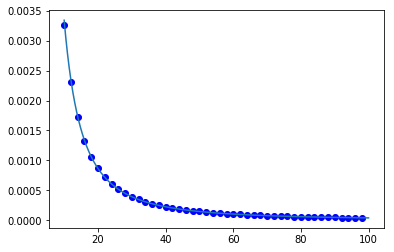

1.95249860507


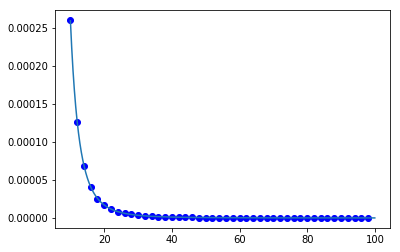

3.93222540865


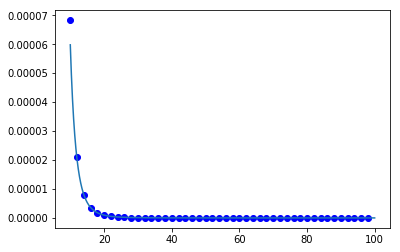

5.96405751013


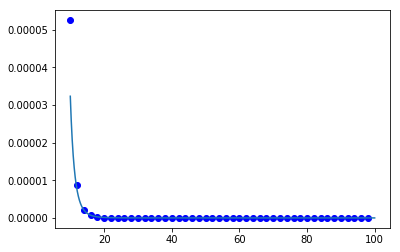

8.08700021038


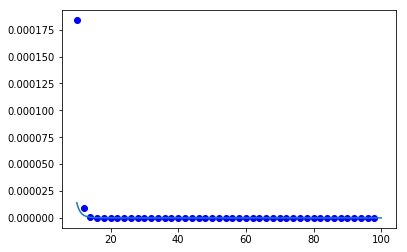

9.30494254323


In [9]:
def T(n):
    return lambda x: math.cos(n * math.acos(x))

def chebyshev_approximate_error(f, N):
    [X_MIN, X_MAX] = [-1.0, 1.0]
    x_notes = np.zeros((N+1,))
    for i in range(0, N+1):
        x_notes[i] = np.cos(np.pi * ((2 * i)+ 1) / (2 * N + 2))
    
    c = np.zeros((N+1,))
    for i in range(0, N+1):
        c[0] = c[0] + f(x_notes[i])
    c[0] = (1 / (N + 1)) * c[0]
    for j in range(1, N+1):
        for k in range(0, N+1):
            c[j] = c[j] + f(x_notes[k]) * (T(j)(x_notes[k]))
        c[j] = (2 / (N + 1)) * c[j]
    
    x = np.arange(X_MIN, X_MAX, 0.001)
    y = np.zeros((x.shape[0],))
    for (x_index, x_value) in enumerate(x):
        for j in range(0, N+1):
            y[x_index] = y[x_index] + c[j] * (T(j)(x_value))
    
    y_original = np.zeros((x.shape[0],))
    for (x_index, x_value) in enumerate(x):
        y_original[x_index] = f(x_value)

    error = np.zeros((x.shape[0]))
    for (x_index, _) in enumerate (x):
        error[x_index] = abs(y_original[x_index] - y[x_index])
        
    return np.amax(error)

def plot_chebyshev_approximate_error(f, n_min, n_max, step):
    x_pos = np.zeros((int((n_max - n_min) / step),))
    y_pos = np.zeros((int((n_max - n_min) / step),))
    for (i, _) in enumerate(x_pos):
        n = n_min + step * i
        x_pos[i] = n
        y_pos[i] = chebyshev_approximate_error(f, n)

    c = np.polyfit(np.log(x_pos), np.log(y_pos), 1)
    a0 = math.exp(c[1])
    a1 = c[0]
    convergence_rate_function = lambda x : a0 * (x ** a1)
    convergence_rate_x = np.arange(n_min, n_max, 0.01)
    convergence_rate_y = np.zeros((convergence_rate_x.shape[0],))
    for (index, x_value) in enumerate(convergence_rate_x):
        convergence_rate_y[index] = convergence_rate_function(x_value)
        
    plt.plot(x_pos, y_pos, 'bo')
    plt.plot(convergence_rate_x, convergence_rate_y)
    plt.show()
    
    print(-a1)
    
plot_chebyshev_approximate_error(lambda x : x**2 if x > 0 else 0,10, 100, 2)
plot_chebyshev_approximate_error(lambda x : x**4 if x > 0 else 0,10, 100, 2)
plot_chebyshev_approximate_error(lambda x : x**6 if x > 0 else 0,10, 100, 2)
plot_chebyshev_approximate_error(lambda x : x**8 if x > 0 else 0,10, 100, 2)
plot_chebyshev_approximate_error(lambda x : x**10 if x > 0 else 0,10, 100, 2)

We conclude that $$r(a)\approx a,$$ 

such that the rate of convergence depends on the parameter $a$ of the function $f_a(x)$.